In [2]:
#loading data set
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [3]:
# Importing some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#showing shape and information about the columns and first few rows of the dataset
print(dataset.head())
print(dataset.info())
#This shows the number of records in the dataset
print(dataset.shape)

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [5]:
#the first row contains column names
dataset.columns = ["sentiment", "ids", "date", "flag", "user", "text"]


In [6]:
dataset.head()

,sentiment,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
# Display unique values in the 'sentiment' column
unique_sentiments = dataset['sentiment'].unique()
print("Unique Sentiments:", unique_sentiments)

# Adjust the mapping based on your sentiment values
sentiment_mapping = {0: 'high stressed', 4: 'low stressed'}
dataset['stress_level'] = dataset['sentiment'].map(sentiment_mapping)

# Checking the class counts
class_counts = dataset['stress_level'].value_counts()

print("Class Counts:")
print(class_counts)

Unique Sentiments: [0 4]
Class Counts:
stress_level
low stressed     800000
high stressed    799999
Name: count, dtype: int64


In [8]:
# Storing data in lists
text, stress_levels = list(dataset['text']), list(dataset['stress_level'])


In [9]:
dataset.head()

,sentiment,ids,date,flag,user,text,stress_level
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,high stressed
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,high stressed
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,high stressed
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",high stressed
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,high stressed


In [10]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [11]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [12]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 308 seconds


In [13]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(processedtext, stress_levels, test_size=0.05, random_state=0)


In [14]:
# Create the folder if it doesn't exist
save_path = 'C:\\Users\\chethan\\OneDrive\\Desktop\\Text Test Data'
os.makedirs(save_path, exist_ok=True)

In [15]:
# Combine the text and labels for the selected test samples
selected_test_data = list(zip(X_test, y_test))

In [ ]:
# TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)

In [15]:
# Transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [16]:
# Evaluate Model Function
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
# Bernoulli Naive Bayes Model
BNBmodel = BernoulliNB(alpha=2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

               precision    recall  f1-score   support

high stressed       0.81      0.79      0.80     39986
 low stressed       0.80      0.81      0.80     40014

     accuracy                           0.80     80000
    macro avg       0.80      0.80      0.80     80000
 weighted avg       0.80      0.80      0.80     80000



In [18]:
# Linear Support Vector Classification Model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

C:\Users\chethan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

high stressed       0.82      0.81      0.82     39986
 low stressed       0.81      0.82      0.82     40014

     accuracy                           0.82     80000
    macro avg       0.82      0.82      0.82     80000
 weighted avg       0.82      0.82      0.82     80000



In [19]:
# Logistic Regression Model
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

               precision    recall  f1-score   support

high stressed       0.83      0.82      0.83     39986
 low stressed       0.82      0.83      0.83     40014

     accuracy                           0.83     80000
    macro avg       0.83      0.83      0.83     80000
 weighted avg       0.83      0.83      0.83     80000



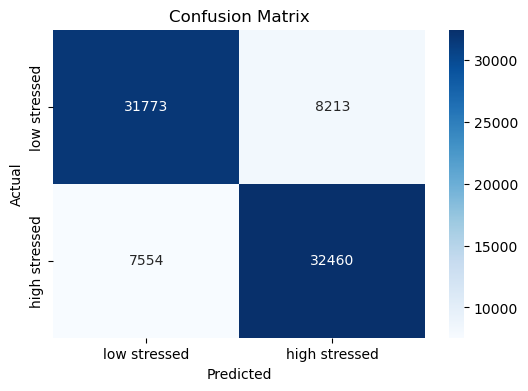

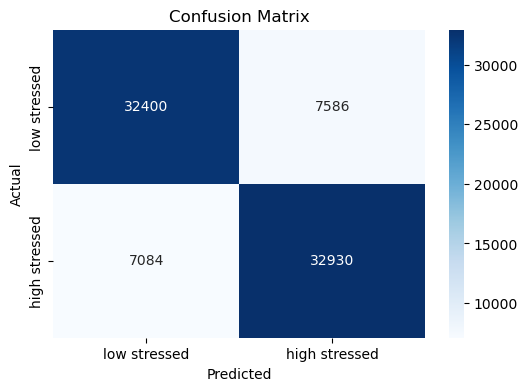

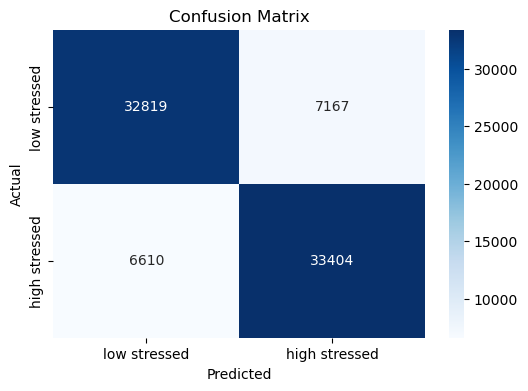

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['low stressed', 'high stressed'], yticklabels=['low stressed', 'high stressed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot Confusion Matrix for Bernoulli Naive Bayes
plot_confusion_matrix(BNBmodel, X_test, y_test)

# Plot Confusion Matrix for Linear Support Vector Classification
plot_confusion_matrix(SVCmodel, X_test, y_test)

# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(LRmodel, X_test, y_test)


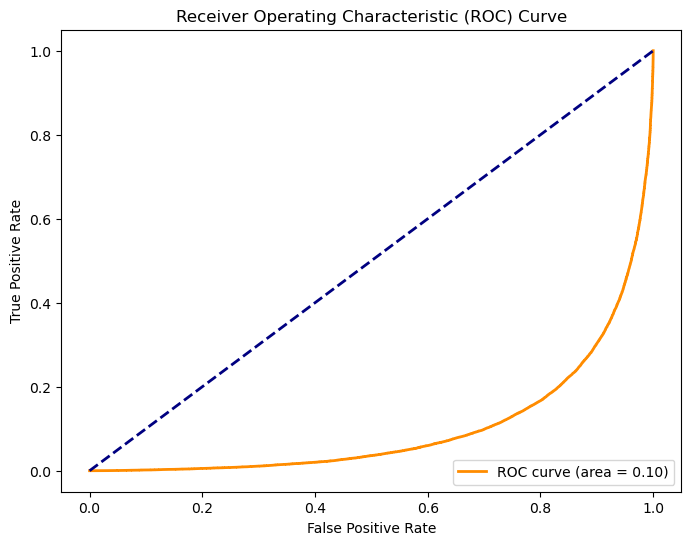

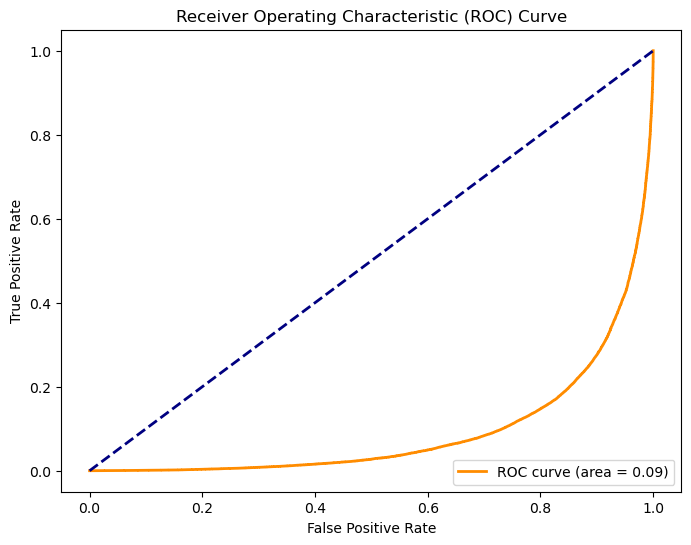

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='high stressed')
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC Curve for Linear Support Vector Classification
plot_roc_curve(SVCmodel, X_test, y_test)

# Plot ROC Curve for Logistic Regression
plot_roc_curve(LRmodel, X_test, y_test)

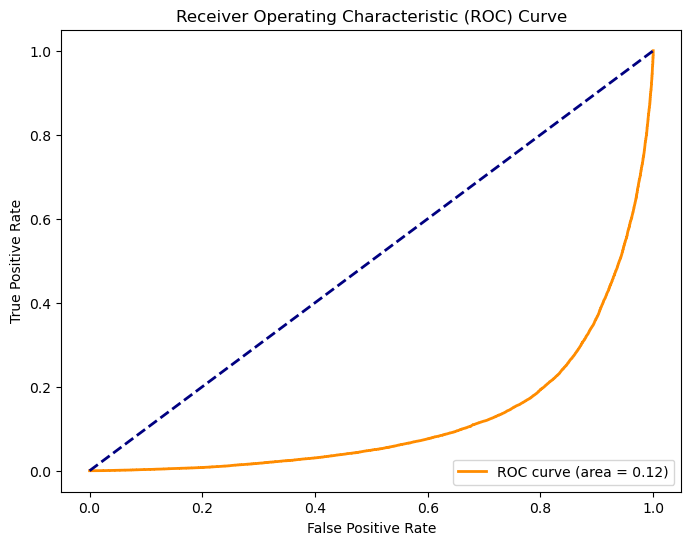

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='high stressed')
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC Curve for Bernoulli Naive Bayes
plot_roc_curve(BNBmodel, X_test, y_test)


In [24]:

# Example text

example_text = ["Dealing with a lot of personal issues lately. It's hard to stay positive."]
# Preprocess the text
processed_example_text = preprocess(example_text)

# Transform the text using the TF-IDF vectorizer
example_text_vectorized = vectoriser.transform(processed_example_text)

# Predict using the Logistic Regression model
example_text_prediction = LRmodel.predict(example_text_vectorized)

# Display the prediction
print("Prediction for the Example Text:")
print(example_text_prediction)

Prediction for the Example Text:
['high stressed']


In [25]:
# Example text
example_text = ["Finished all my tasks for the day. Feeling relaxed and content."]

# Preprocess the text
processed_example_text = preprocess(example_text)

# Transform the text using the TF-IDF vectorizer
example_text_vectorized = vectoriser.transform(processed_example_text)

# Predict using the Logistic Regression model
example_text_prediction = LRmodel.predict(example_text_vectorized)

# Display the prediction
print("Prediction for the Example Text:")
print(example_text_prediction)

Prediction for the Example Text:
['low stressed']


In [27]:
from joblib import dump

# Replace 'C:/Users/chethan/Downloads/RIC/logistic_regression_model.joblib' with your desired path and filename
save_path_lr = 'C:/Users/chethan/Downloads/RIC/logistic_regression_model.joblib'

# Save the Logistic Regression model
dump(LRmodel, save_path_lr)

print(f"Logistic Regression model saved successfully at: {save_path_lr}")

Logistic Regression model saved successfully at: C:/Users/chethan/Downloads/RIC/logistic_regression_model.joblib
